**Name: Christ-Brian Amedjonekou**  
**Date: 2/11/2019**  
**MAT 4880-D692 (Math Modeling II) Astronaut**  
**Spring 2019, Section: D692, Code: 36561**  
**Instructor: Johann Thiel**

# Section 4.3 - Discrete Time Dynamical Systems

## The Astronaut Problem

*Variables*

$v_n = $ velocity at time step $n$

$c = $ time to make control adjustment

$w = $ wait time to next adjustment

$a_n = $ acceleration at time step $n$

*Assumptions*

$v_{n+1} = v_n+a_{n-1}\cdot c + a_n\cdot w$

$a_n = -kv_n$

*Objective*

Determine if $v_n\to 0$.

To make matters simpler, we define $x_1(n) = v_n$ and $x_2(n)=v_{n-1}$ as our state variables.

### Packages

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Variables

In [18]:
k = 0.1
w = 8
c = 0

### Functions

In [56]:
def deltaX1(x1, x2, k = 0.1, w = 8, c = 5): 
    """Returns the change in x1"""
    return -k*w*x1-k*c*x2


def deltaX2(x1,x2):
    """Returns the change in x1"""
    return x1-x2


def approxVectors(x1_0= -4, x2_0 = 3):
    Lx, Ly = [x1_0], [x2_0]
    for i in range(10):
        x1_Last = Lx[-1]
        x2_Last = Ly[-1]
        x1_New = x1_Last + deltaX1(x1_Last,x2_Last)
        x2_New = x2_Last + deltaX2(x1_Last,x2_Last)
        Lx.append(x1_New)
        Ly.append(x2_New)
    return Lx, Ly

### Plots

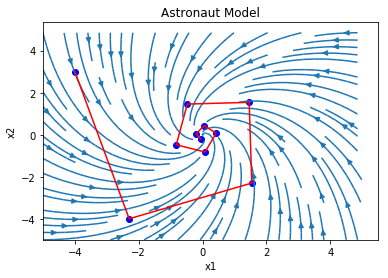

In [61]:
%matplotlib inline

# Creates the grid for my vector field
x1, x2 = np.linspace(-5, 5), np.linspace(-5, 5)
X1, X2 = np.meshgrid(x1, x2)

# Creates the points the vector field
U, V = deltaX1(X1, X2), deltaX2(X1, X2)

# Creates the Figure for my plots
fig, ax1 = plt.subplots()
ax1.set(xlabel= 'x1', ylabel= 'x2', title= 'Astronaut Model')
ax1.streamplot(X1, X2, U, V)
ax1.scatter(approxVectors()[0], approxVectors()[1], color= 'blue')
ax1.plot(approxVectors()[0], approxVectors()[1], color= 'red')